In [12]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np

path = './stanfiles/Bernoulli.stan' #Path to Stan model

### Model and Data

In [3]:
model = CmdStanModel(stan_file = path)

data = {
    "N" : 10,
    "y" : [0,1,0,0,0,0,0,0,0,1]
}

### Sampling From Posterior

In [6]:
chains = 4
draws = 5000

fit = model.sample(data=data, iter_sampling = draws, chains=chains)

17:21:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                         | 00:00 Status
chain 2 |                                                         | 00:00 Status

chain 3 |                                                         | 00:00 Status


chain 1 |█████████████████████▋| 00:00 Iteration: 5800 / 6000 [ 96%]  (Sampling)
chain 2 |█████████████████████▎| 00:00 Iteration: 5700 / 6000 [ 95%]  (Sampling)


chain 1 |█████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |█████████████████████████████████████████████| 00:00 Sampling completed


chain 3 |█████████████████████████████████████████████| 00:00 Sampling completed
chain 4 |█████████████████████████████████████████████| 00:00 Sampling completed


17:21:27 - cmdstanpy - INFO - CmdStan done processing.


In [8]:
#check that this equals (draws, chains, columns) 
#Note: columns is 7 + number of variables in your model (7 is a baseline for HMC)

fit.draws().shape 

(5000, 4, 8)

In [9]:
#All samples for theta:

print(fit.stan_variables(), '\n')
print("Size : ", fit.stan_variables()['theta'].size)

{'theta': array([0.183545, 0.121847, 0.264594, ..., 0.15022 , 0.228676, 0.293331])} 

Size :  20000


### Results

In [10]:
#Model Summary

print(fit.summary())

           Mean      MCSE    StdDev       5%       50%       95%    N_Eff  \
lp__  -7.275000  0.008397  0.749303 -8.76915 -6.987240 -6.750020  7962.07   
theta  0.250664  0.001366  0.119825  0.07917  0.237302  0.469278  7696.20   

       N_Eff/s    R_hat  
lp__   48549.2  1.00019  
theta  46928.1  1.00047  


The theoretical posterior distribution is:

$P(\theta | X) \propto \sum_{i=1}^{N} \theta^{x_i}(1-\theta)^{1-x_i} 
\frac{\Gamma(2)}{\Gamma(1) \Gamma(1)} = (1-\theta)^8\theta^2$, so

$P(\theta | X) \propto \text{Bernoulli}(3,9)$

In [13]:
x = np.linspace(0,1,1000)
y = beta.pdf(x, 3, 9)

Text(0, 0.5, 'posterior')

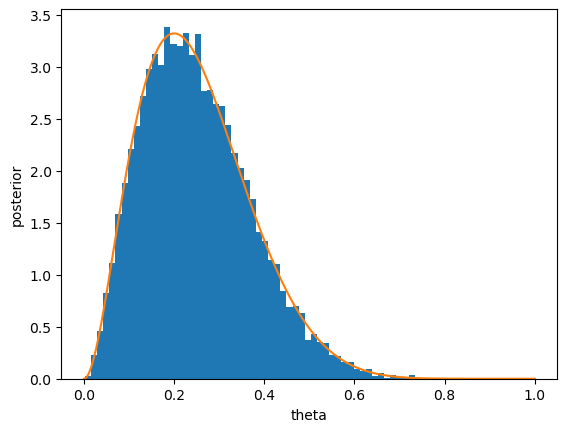

In [18]:
#Fit is very good!

plt.hist(fit.stan_variables()['theta'],
         bins=60,
         density = True
         );

plt.plot(x,y)
plt.xlabel("theta")
plt.ylabel("posterior")